In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read csv w/out header
data = pd.read_csv('../data/Capital_Flats_2021-12-01_14_20_34.csv', header=None, low_memory=False)

# Forward fill the header name for each PowerScout
data.iloc[0] = data.T[0].fillna(method='ffill')

# Rename the 'nan' block
data.loc[0, 0] = 'Timestamp'

# Create the multi-index
data.columns = [list(data.iloc[0]), list(data.iloc[1])]

# Drop the first two rows because they're just the column names
data = data[2:].dropna(how='all', axis=1)

# Convert timestamp column to datetime format
data.Timestamp = pd.to_datetime(data.Timestamp.Timestamp, infer_datetime_format=True)

# # Set Timestamp column as index, set columns to type 'float'
data = data[2:].set_index([('Timestamp', 'Timestamp')]).replace('-', np.nan).astype(float)

In [3]:
# Slice to the two power systems we're monitoring
gross_power_cols = ['PowerScout DPS126', 'PowerScout DPS121']
gross_power = data[gross_power_cols]

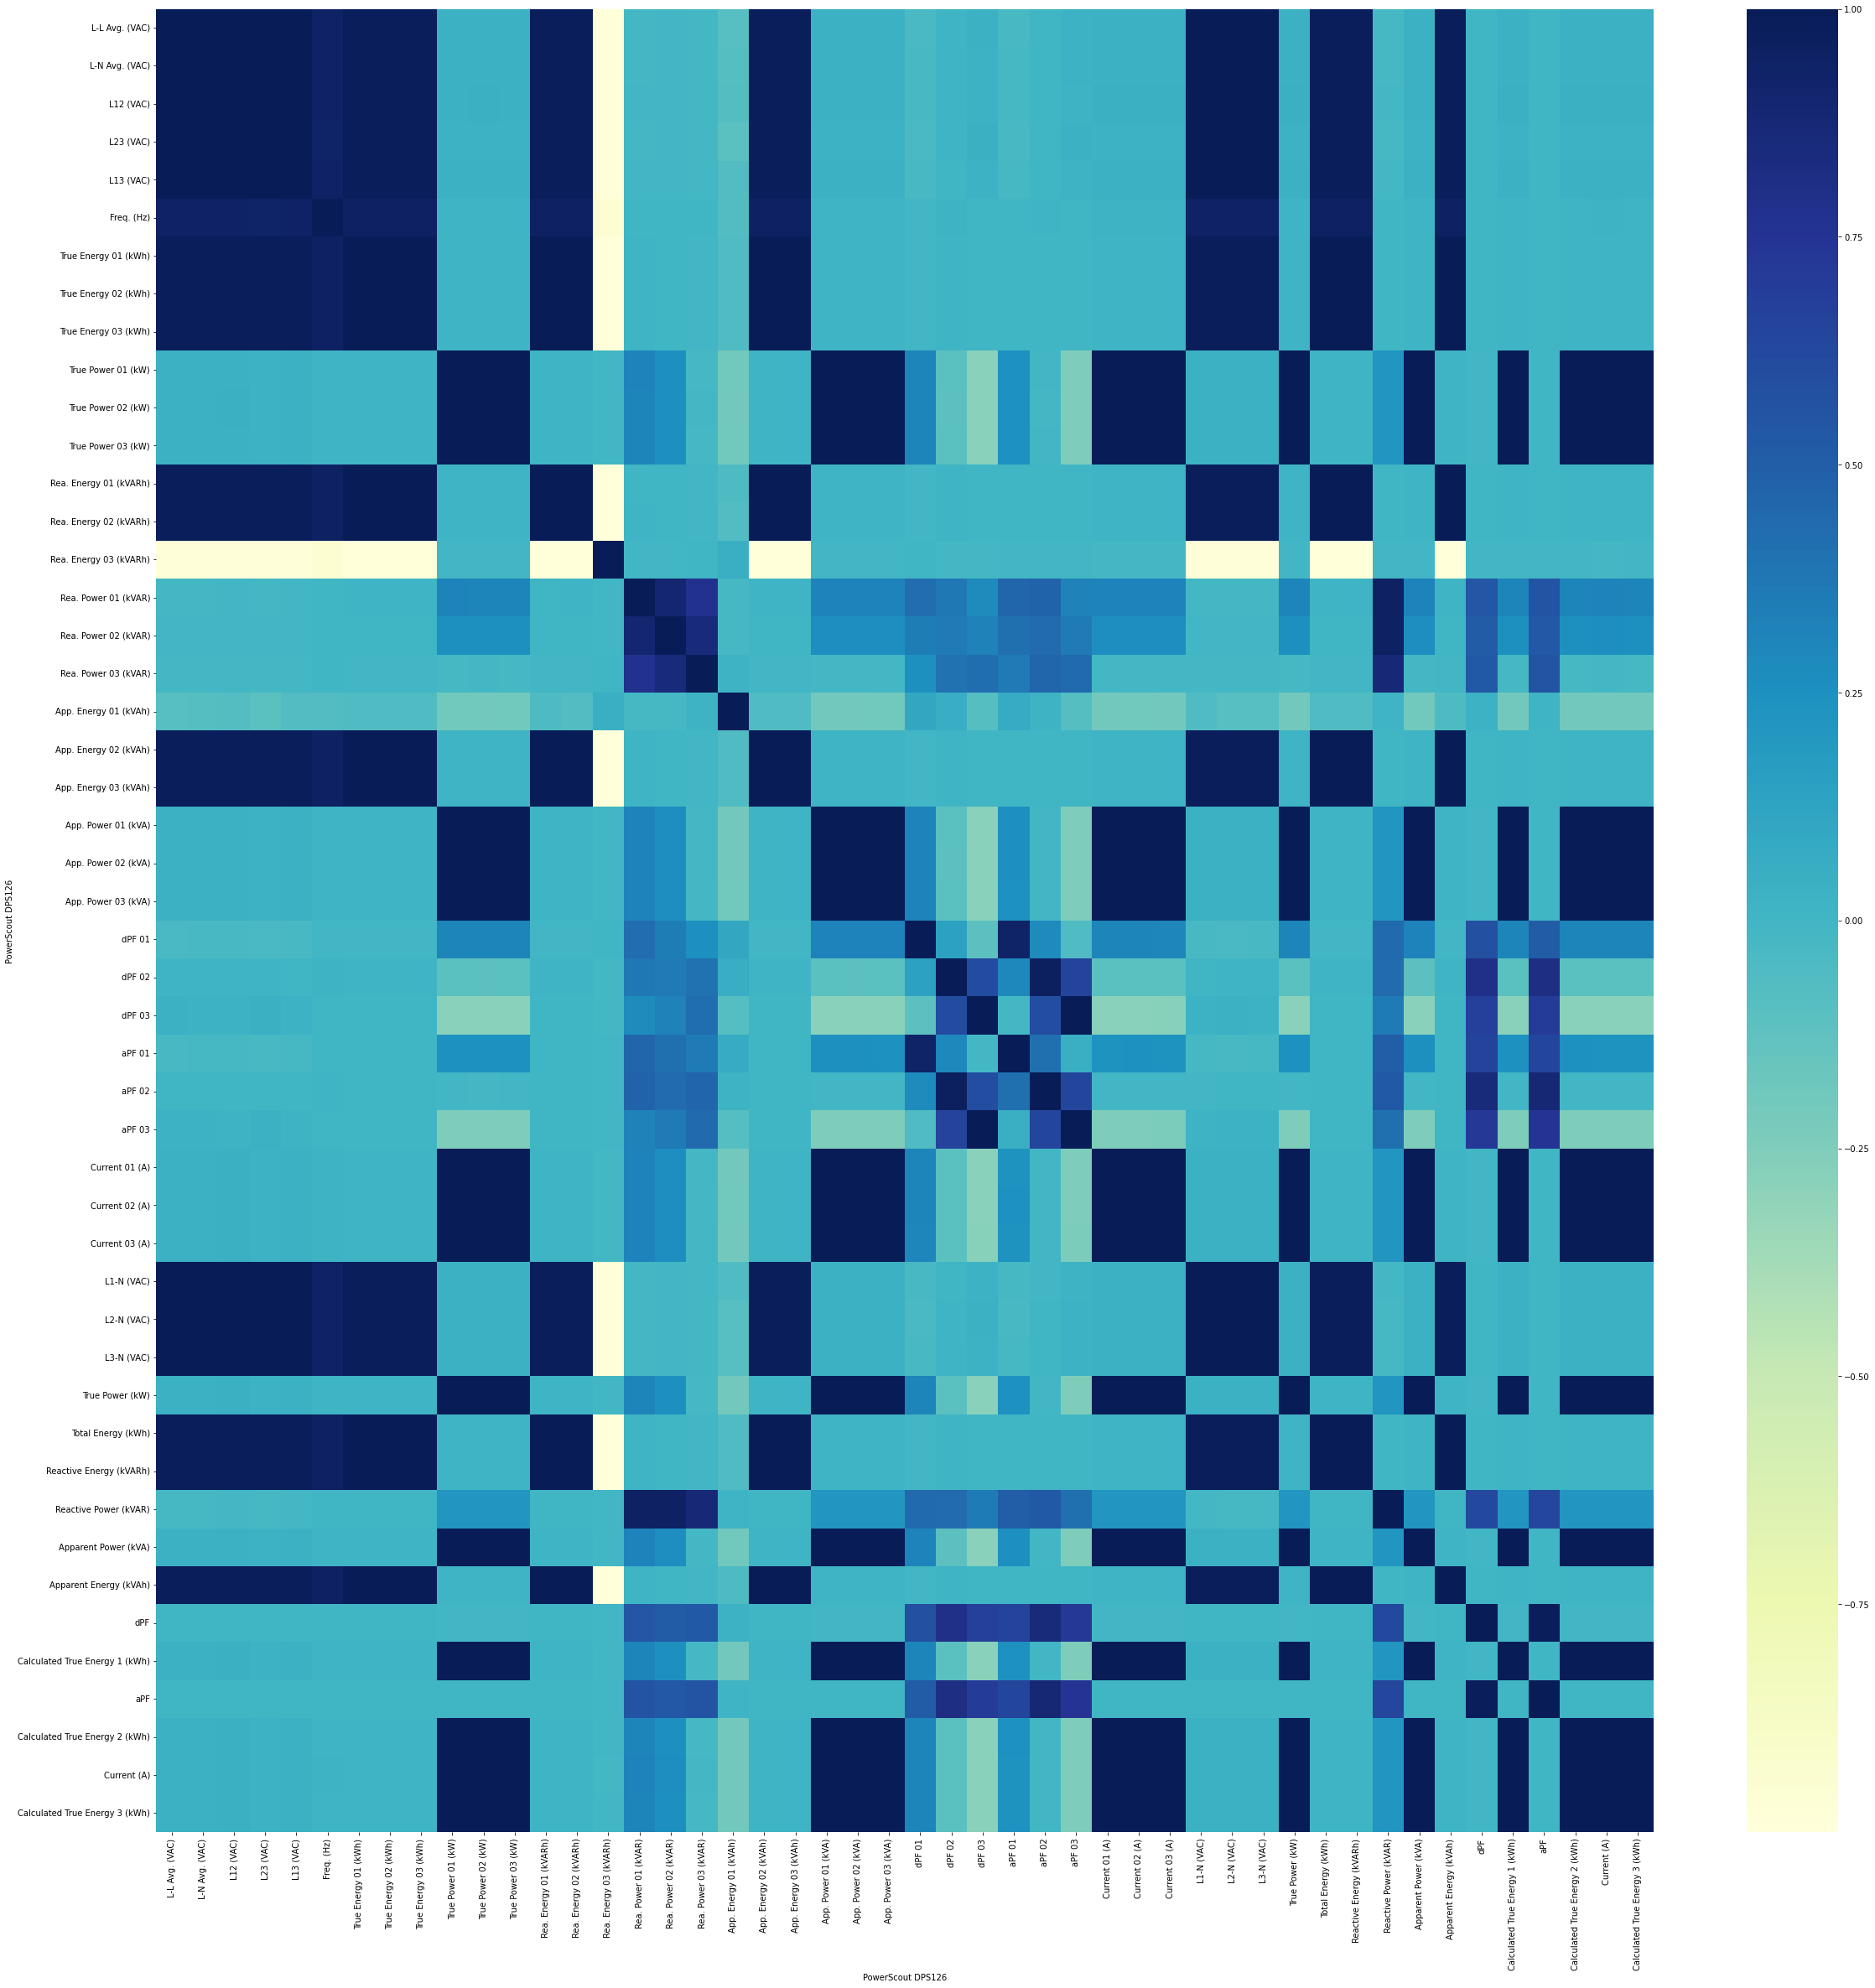

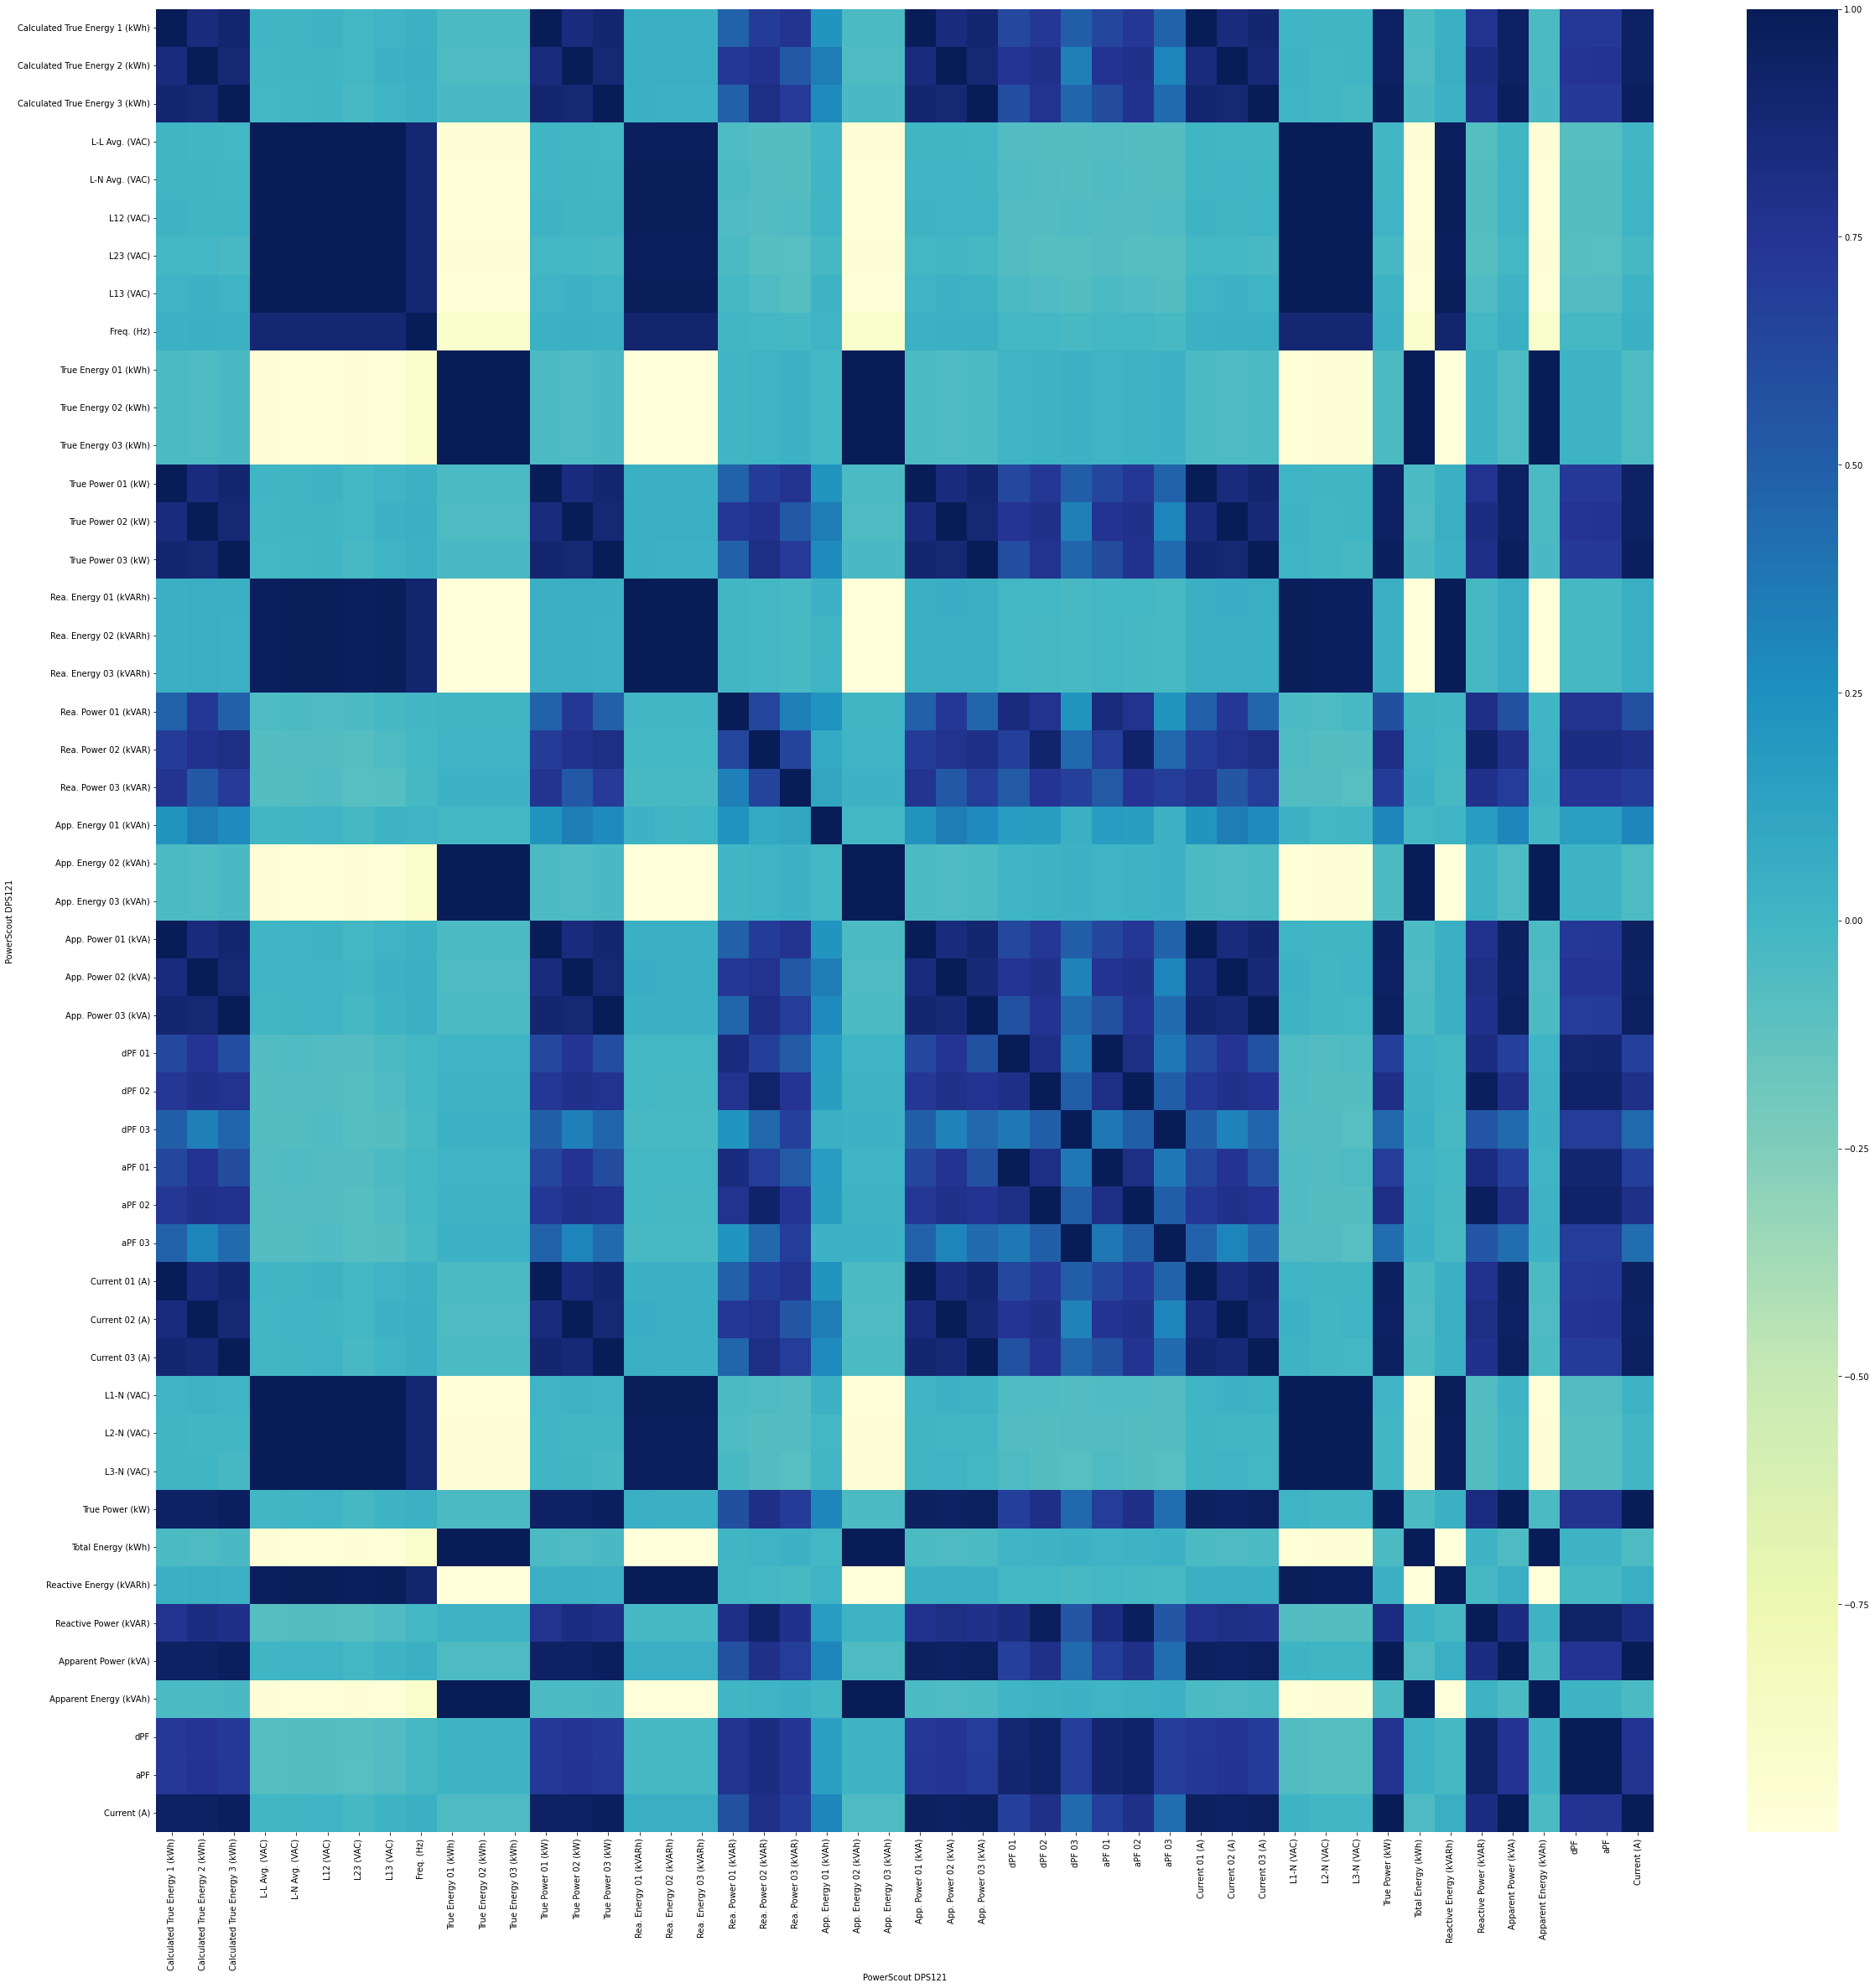

In [4]:
plt.figure(figsize=(40, 40))
hm = sns.heatmap(gross_power['PowerScout DPS126'].corr(), cmap='YlGnBu')
hm.set(xlabel='PowerScout DPS126'
       ,ylabel='PowerScout DPS126'
      )
plt.show()

plt.figure(figsize=(40, 40))
hm = sns.heatmap(gross_power['PowerScout DPS121'].corr(), cmap='YlGnBu')
hm.set(xlabel='PowerScout DPS121'
       ,ylabel='PowerScout DPS121'
      )
plt.show()

In [5]:
gross_power['PowerScout DPS126'].corrwith(gross_power['PowerScout DPS121'])

L-L Avg. (VAC)                    0.715507
L-N Avg. (VAC)                    0.714287
L12 (VAC)                         0.713599
L23 (VAC)                         0.717473
L13 (VAC)                         0.712762
Freq. (Hz)                        0.678308
True Energy 01 (kWh)             -0.706978
True Energy 02 (kWh)             -0.706982
True Energy 03 (kWh)             -0.706974
True Power 01 (kW)                0.055662
True Power 02 (kW)               -0.008261
True Power 03 (kW)                0.075333
Rea. Energy 01 (kVARh)            0.706832
Rea. Energy 02 (kVARh)            0.707218
Rea. Energy 03 (kVARh)           -0.706728
Rea. Power 01 (kVAR)              0.049773
Rea. Power 02 (kVAR)              0.022016
Rea. Power 03 (kVAR)              0.037372
App. Energy 01 (kVAh)             0.875751
App. Energy 02 (kVAh)            -0.706983
App. Energy 03 (kVAh)            -0.706975
App. Power 01 (kVA)               0.052968
App. Power 02 (kVA)              -0.015822
App. Power 

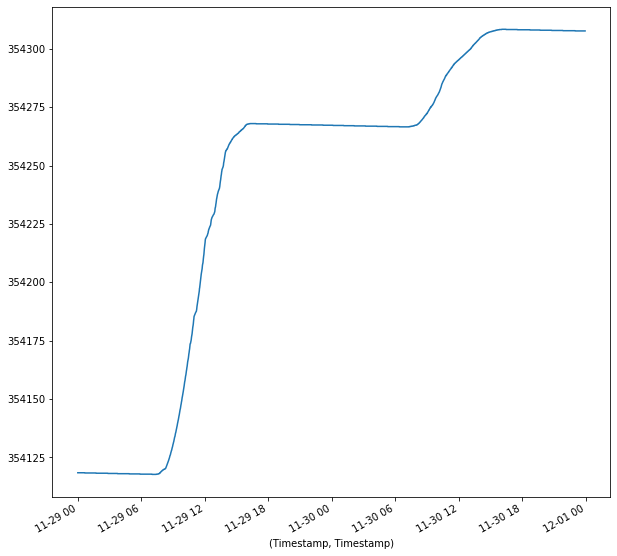

In [6]:
dps126_tot_energy = gross_power[gross_power['PowerScout DPS126']['Total Energy (kWh)'] > 0]['PowerScout DPS126']['Total Energy (kWh)']

plt.figure(figsize=(10, 10))
dps126_tot_energy.plot()
plt.show()